# Bike Sharing Service System Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better.
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

Essentially, The company wants to know:


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

**So interpretation is important!**

## Step 1: Reading, Understanding and Cleaning the Data

In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
# reading and inspecting data details
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df.shape

(730, 16)

In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [13]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no missing values in the data

### Cleaning Data

In [17]:
# Removing the unnecessary column
# According to the data dictionary 'instant' column represents 'record index' which is clearly not a predictor variable for our model
df.drop(['instant'], axis = 1, inplace = True)

In this scenario, we should drop the casual and registered columns before building the model to predict cnt.

Because of:
Multicollinearity: The casual and registered columns are likely to be highly correlated with the target variable cnt because cnt is the sum of these two columns. Including highly correlated predictors can lead to multicollinearity, which can inflate the variance of the model coefficients and make the model less stable.

Data Leakage: Including casual and registered as features would effectively "leak" information from the target variable into the predictors, making the model's performance appear better than it would in a real-world setting. This is because the model would be learning the relationship from the variables that directly sum up to the target.

Predictive Utility: From a predictive modeling perspective, the model's goal is to predict cnt using other features in the dataset. If casual and registered are used, the model is essentially being told what cnt is, which defeats the purpose of building the model.

Hence, they are not the features for our model.


In [20]:
df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [22]:
# From the data, we understand that when it is a holiday (i.e when df["holiday"]=1) then it is not a working day (i.e df["workingday"]=0)
# So it is a repeated information and we can drop the 'holiday' variable
df.drop(['holiday'], axis = 1, inplace = True)

In [24]:
# Splitting date column - 'dteday' and keeping only day as 'mnth', 'yr' and 'weekday' columns are already there (redundant)
df["day"] = pd.to_datetime(df['dteday'], format='%d-%m-%Y').dt.day
df.drop(['dteday'], axis = 1, inplace = True)

In [26]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


### Update values of Categorical variables as mentioned in the problem statement

In [29]:
# update values of 'season'
df["season"].replace(1, 'spring', inplace=True)
df["season"].replace(2, 'summer', inplace=True)
df["season"].replace(3, 'fall', inplace=True)
df["season"].replace(4, 'winter', inplace=True)

In [31]:
# column of 'yr' has two values (0: 2018, 1:2019) 
# so keeping year as is, because this categorical column is already converted to numerical values (0s and 1s)
# Although we may change the column name to make it more readable
df = df.rename(columns={'yr': '2019'})


In [33]:
# update values of 'mnth'
df["mnth"].replace(1, 'January', inplace=True)
df["mnth"].replace(2, 'February', inplace=True)
df["mnth"].replace(3, 'March', inplace=True)
df["mnth"].replace(4, 'April', inplace=True)
df["mnth"].replace(5, 'May', inplace=True)
df["mnth"].replace(6, 'June', inplace=True)
df["mnth"].replace(7, 'July', inplace=True)
df["mnth"].replace(8, 'August', inplace=True)
df["mnth"].replace(9, 'September', inplace=True)
df["mnth"].replace(10, 'October', inplace=True)
df["mnth"].replace(11, 'November', inplace=True)
df["mnth"].replace(12, 'December', inplace=True)

In [35]:
# update values of 'weekday' starting 0 as sunday, because we can see every weekday '6' and '0' are not working days.
df["weekday"].replace(0, 'Sunday', inplace=True)
df["weekday"].replace(1, 'Monday', inplace=True)
df["weekday"].replace(2, 'Tuesday', inplace=True)
df["weekday"].replace(3, 'Wednesday', inplace=True)
df["weekday"].replace(4, 'Thursday', inplace=True)
df["weekday"].replace(5, 'Friday', inplace=True)
df["weekday"].replace(6, 'Saturday', inplace=True)

In [37]:
# update values of 'weathersit'
df["weathersit"].replace(1, 'Clear', inplace=True) # For 1: Clear, Few clouds, Partly cloudy, Partly cloudy
df["weathersit"].replace(2, 'Mist', inplace=True) # For 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
df["weathersit"].replace(3, 'Light Rain', inplace=True) # For 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
df["weathersit"].replace(4, 'Heavy Rain', inplace=True) # For 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [39]:
df.head()

,season,2019,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,January,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,January,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,January,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,January,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,January,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


## Step 2: Visualising the Data (EDA)
## Univariate Analysis

In [42]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
cat_cols = ['season','2019','mnth', 'weekday','workingday','weathersit']

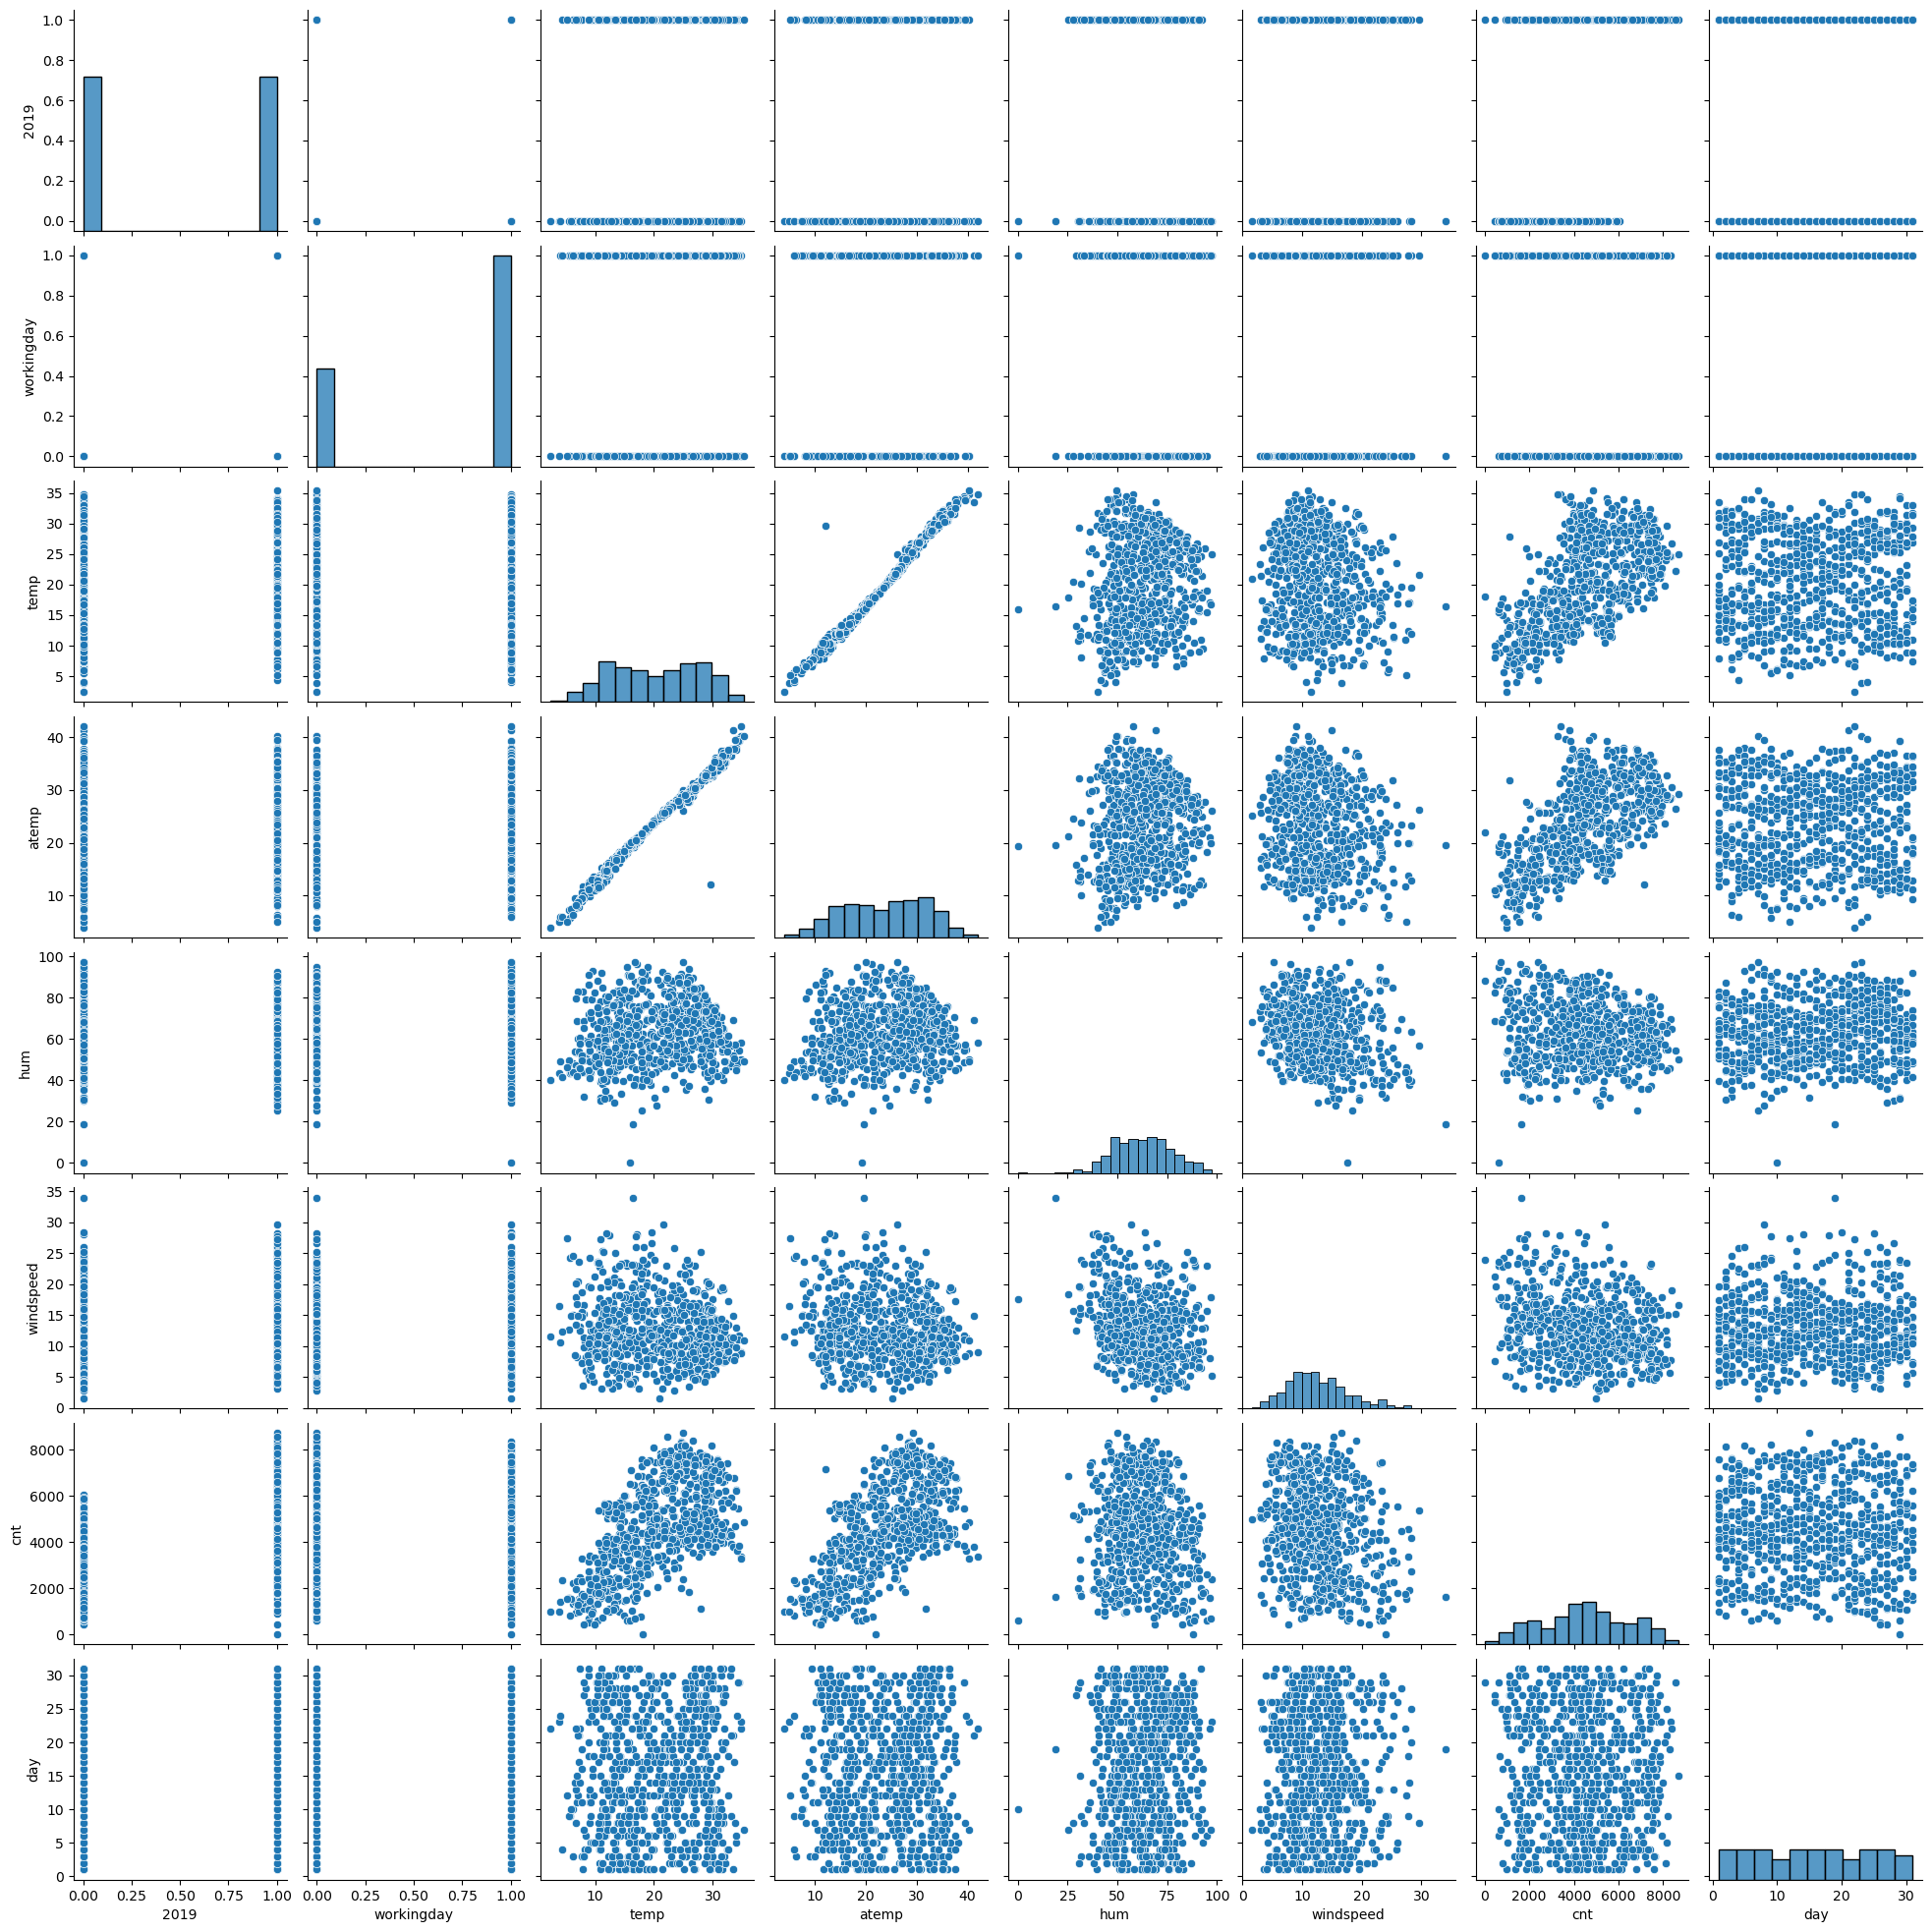

In [44]:
# pairplot of all the variables
sns.pairplot(df)
plt.show()

In [45]:
# From the pairplot above, we conclude that date has no relation with whether a bike is booked or not, 
#but 'workingday' is more important variable
# So we can drop the 'day' variable

df.drop(['day'], axis = 1, inplace = True)


In [46]:
df.head()

,season,2019,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Categorical

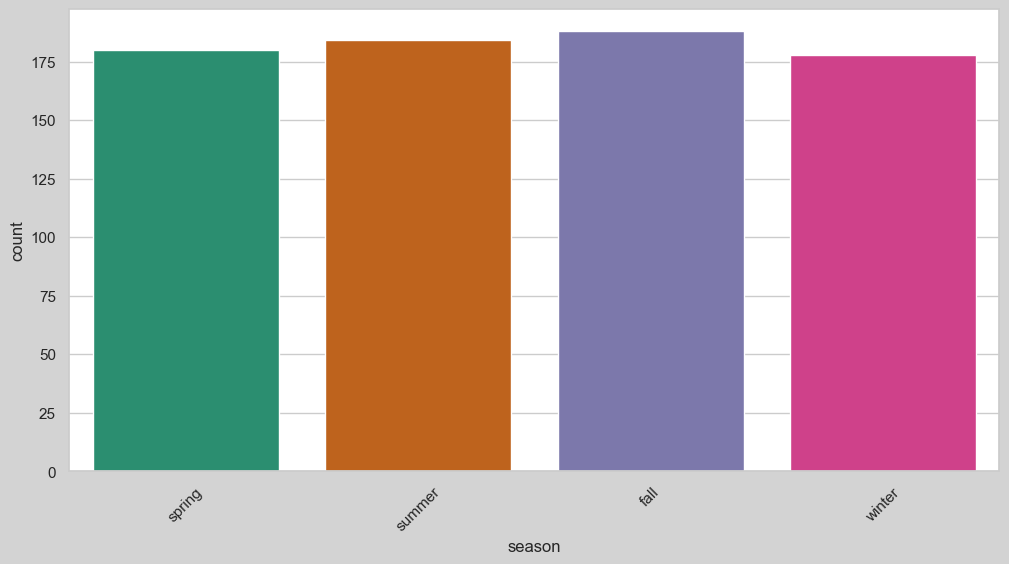

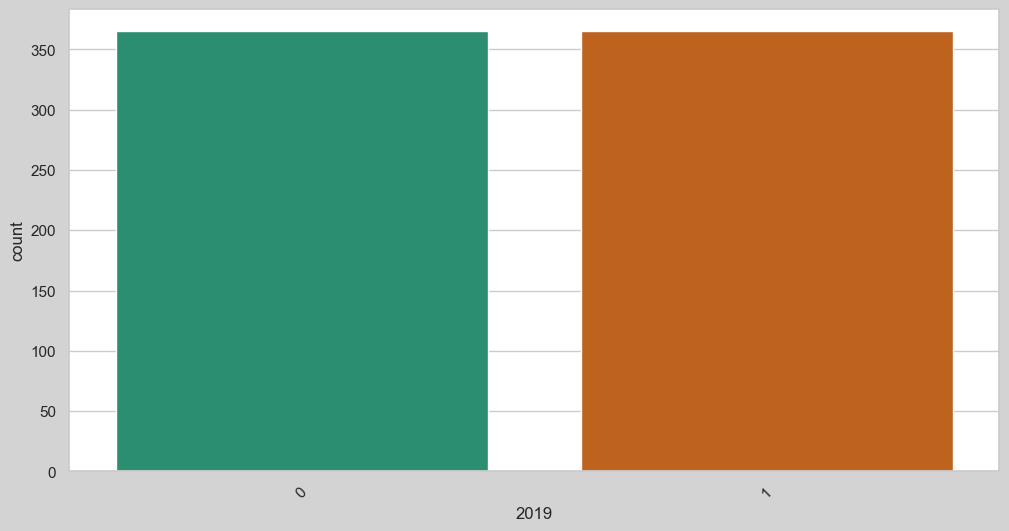

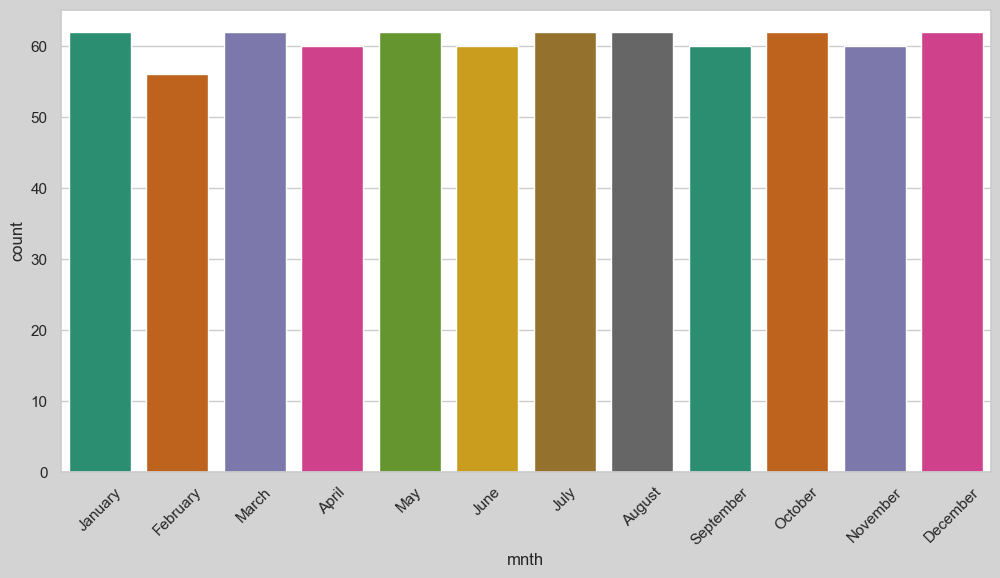

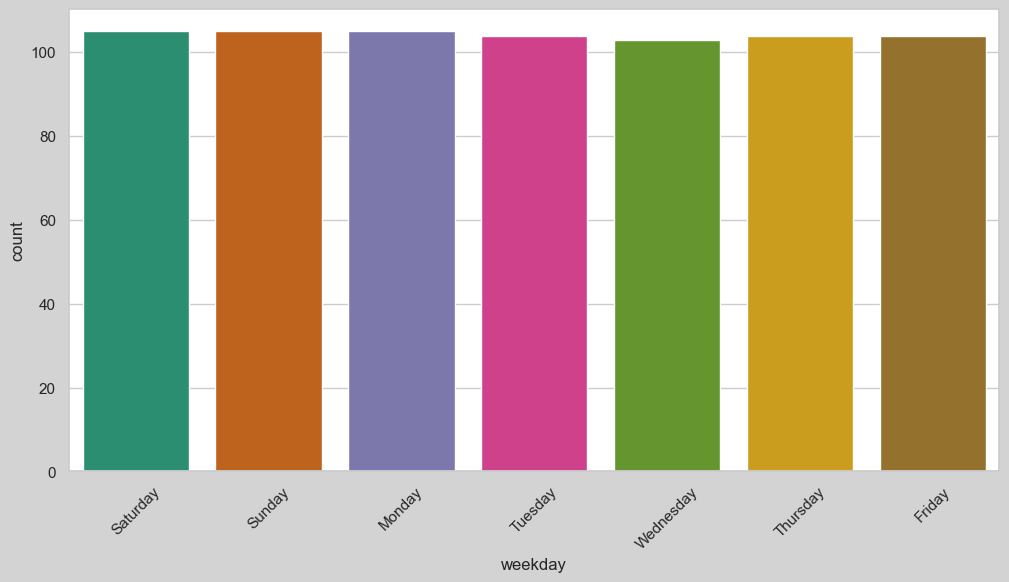

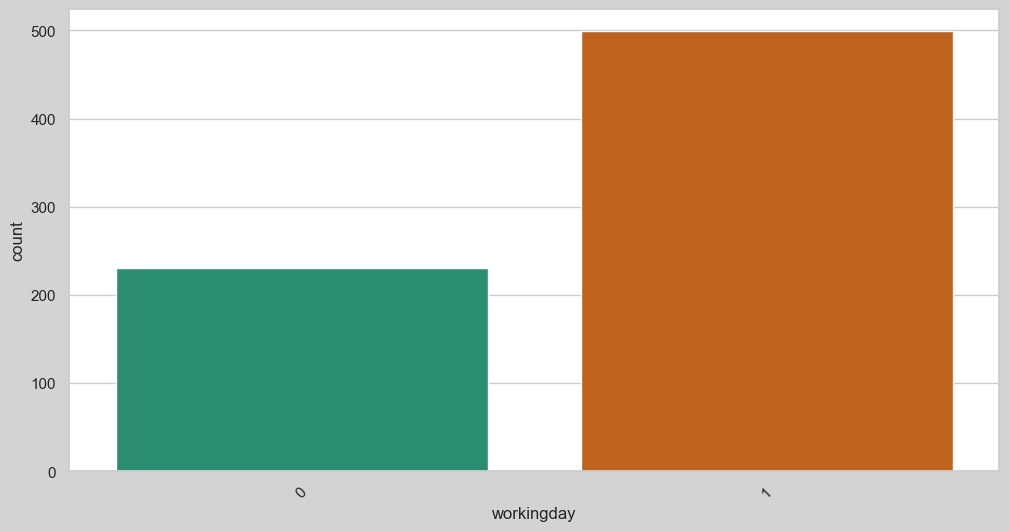

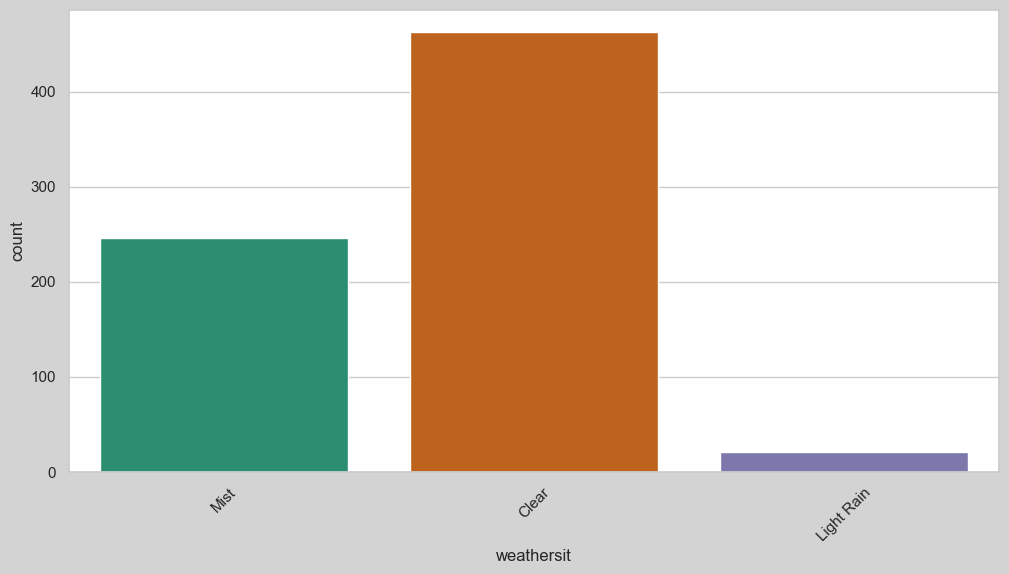

In [51]:
for col in cat_cols:
    plt.figure(figsize=(12, 6), facecolor='lightgray')
    sns.set(style="whitegrid")
    sns.countplot(x=col,data = df,palette='Dark2')
    plt.xticks(rotation=45)
    plt.show()

##### Observation: People tend to make bookings on days with clear weather, least in 'Light Rain' and none in 'Heavy Rain'

#### Numerical

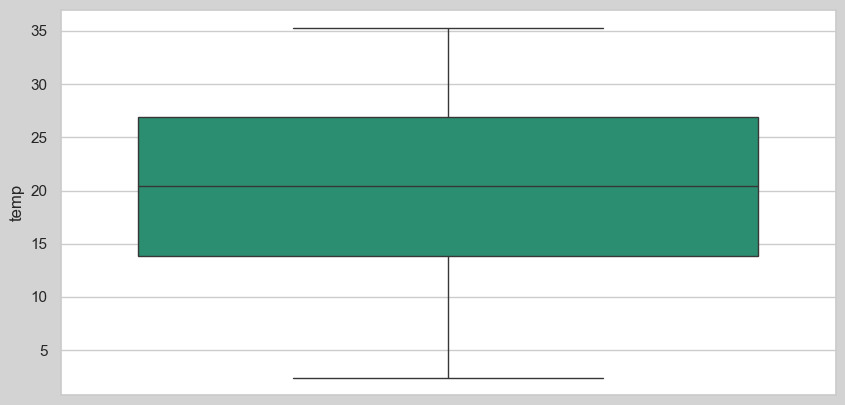

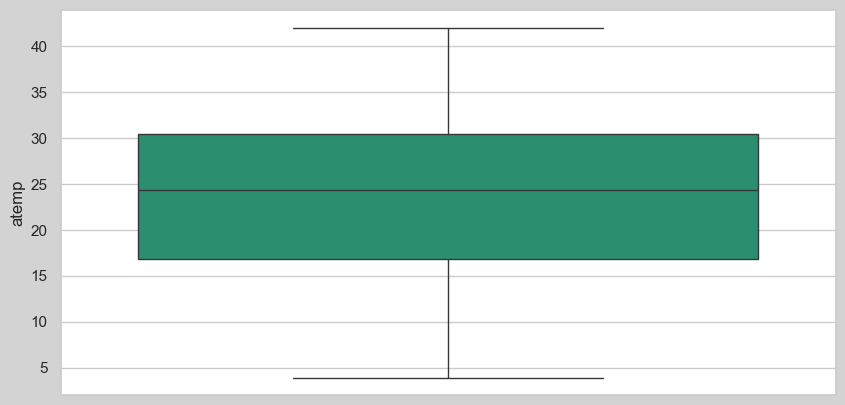

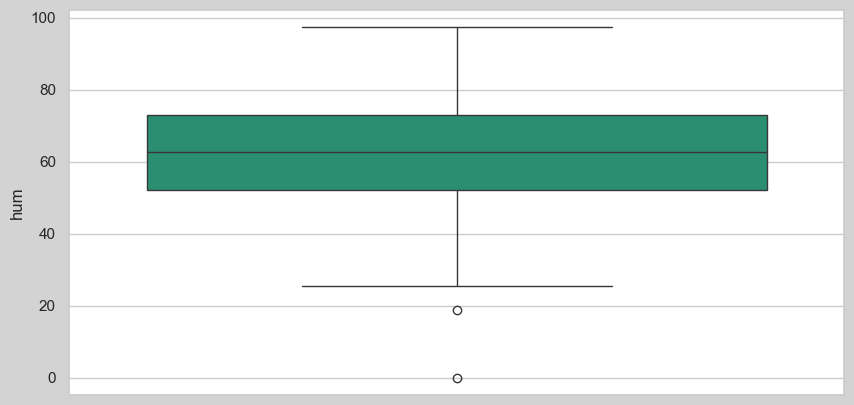

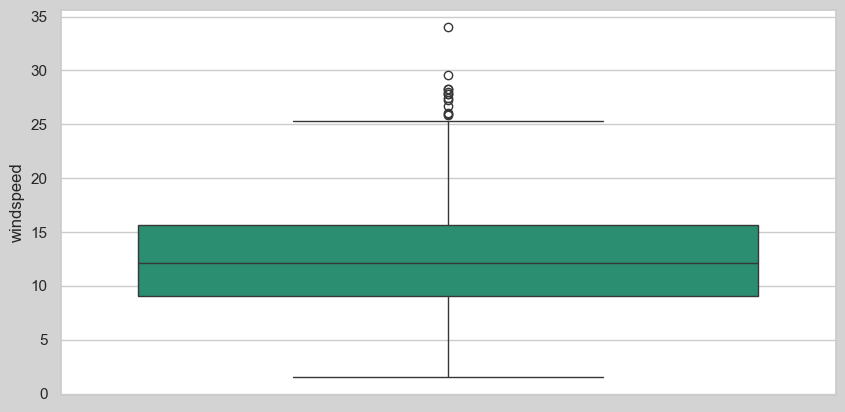

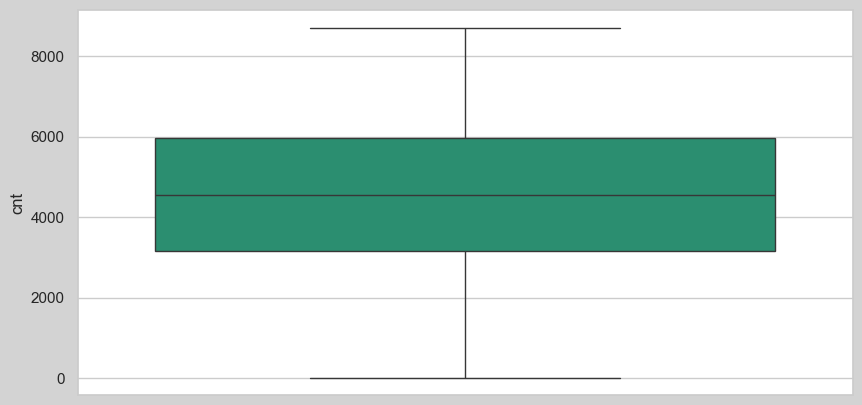

In [57]:
for col in num_cols:
    plt.figure(figsize=(10, 5), facecolor='lightgray')
    sns.set(style="whitegrid")
    sns.boxplot(df[col], palette='Dark2')
    plt.show()

#### Observations:
1. People tend to make bookings when the temp is between 14-27
2. People tend to make bookings when the atemp is between 17-30
3. People tend to make bookings when the hum is between 50-70.5
2. People tend to make bookings when the windspeed is between 17-30, although there are some outliers.

## Bivariate Analysis

### Visualising Categorical against cnt

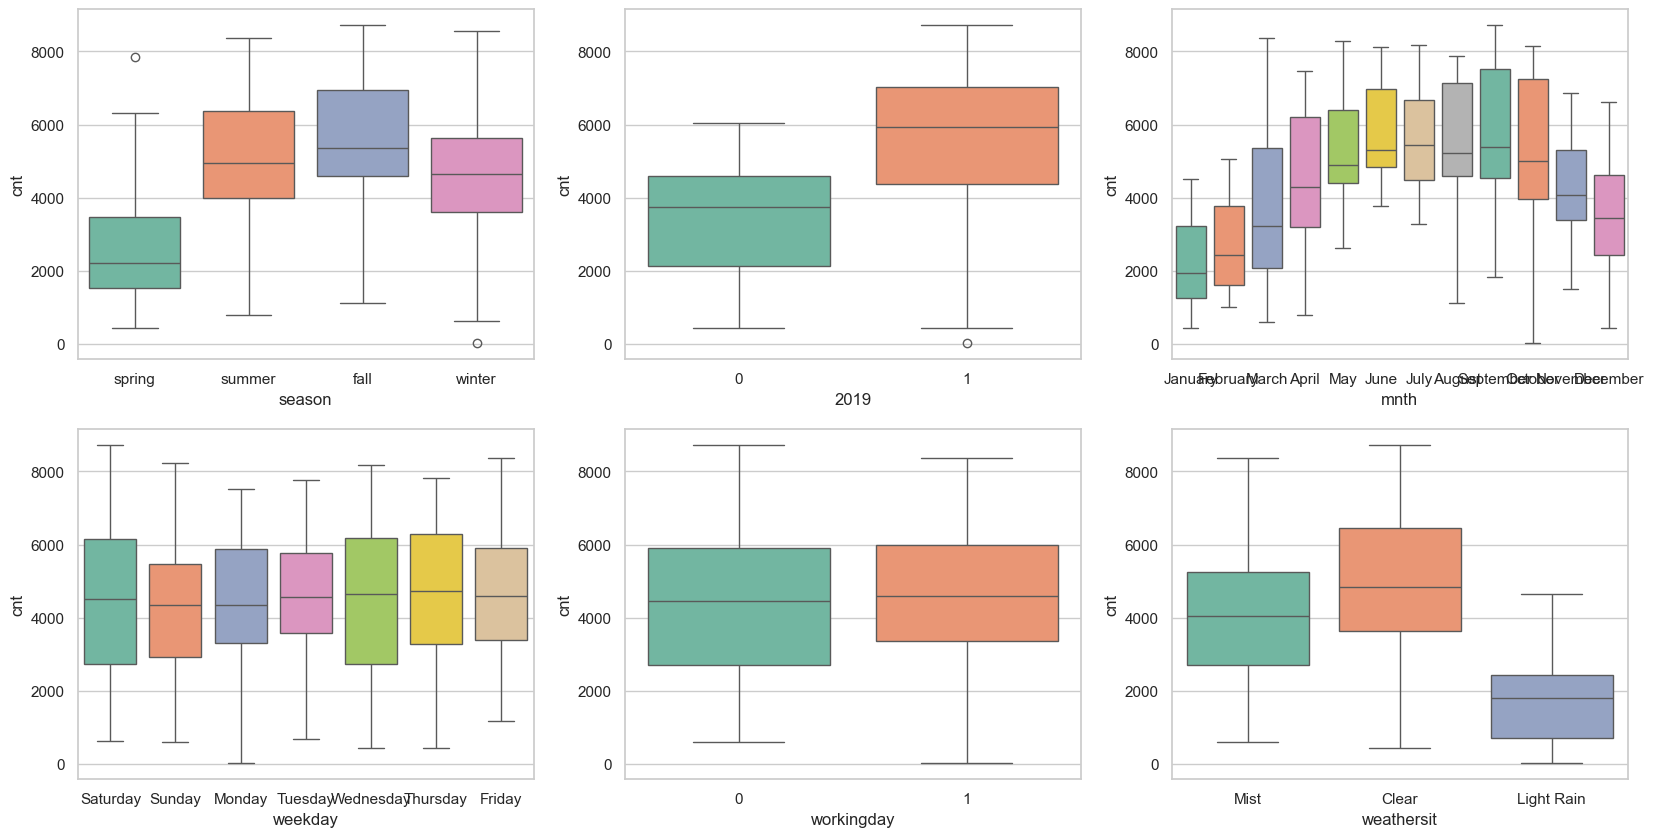

In [62]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df,palette='Set2')
plt.subplot(2,3,2)
sns.boxplot(x = '2019', y = 'cnt', data = df,palette='Set2')
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df,palette='Set2')
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df,palette='Set2')
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df,palette='Set2')
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df,palette='Set2')
plt.show()

#### Observations:
 - 'cnt' increases from spring to summer with further increase in fall and slight decrease in winter which is obviously due to the weather conditions in the seasons. Spring has the lowest median count and a smaller IQR, indicating lower and less variable booking.
Summer and fall have higher medians and larger IQRs, suggesting higher and more variable booking.
Winter shows a lower median than summer and fall but higher than spring, with a slightly smaller I
-
 - there is increase in cnt from 2018 to 20indicating that bookings were higher and more variable in 2019 19 (as suggested in the problem statement - 'bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing').
 - There is a noticeable increase in ‘cnt’ from January to around July or August, with the highest median and IQR around these months, followed by a decline toward December. This suggests seasonal variation in the bookings
 - there is not much difference in 'cnt' values for weekdays or weekends (box size is large on Wednesdays, Thursdays and Saturda. The median counts appear relatively consistent across the weekdays, with some variations in the IQRs. No significant difference is apparent, indicating that bookings are similar regardless of the day of the weekys)
There is a slight increase in the median count on working days, but the difference in the IQR is not substantial, suggesting only a minor variation between working and non-working ays
 - 'cnt' is high for 'clear' weat(highest median and IQR, indicating higher and more variable bookings)her and very low foLight Raininy' weat(lowest median and IQR)her, which is obvi, and None in 'Heavy Rain'us.

#### Bivariate Numerical

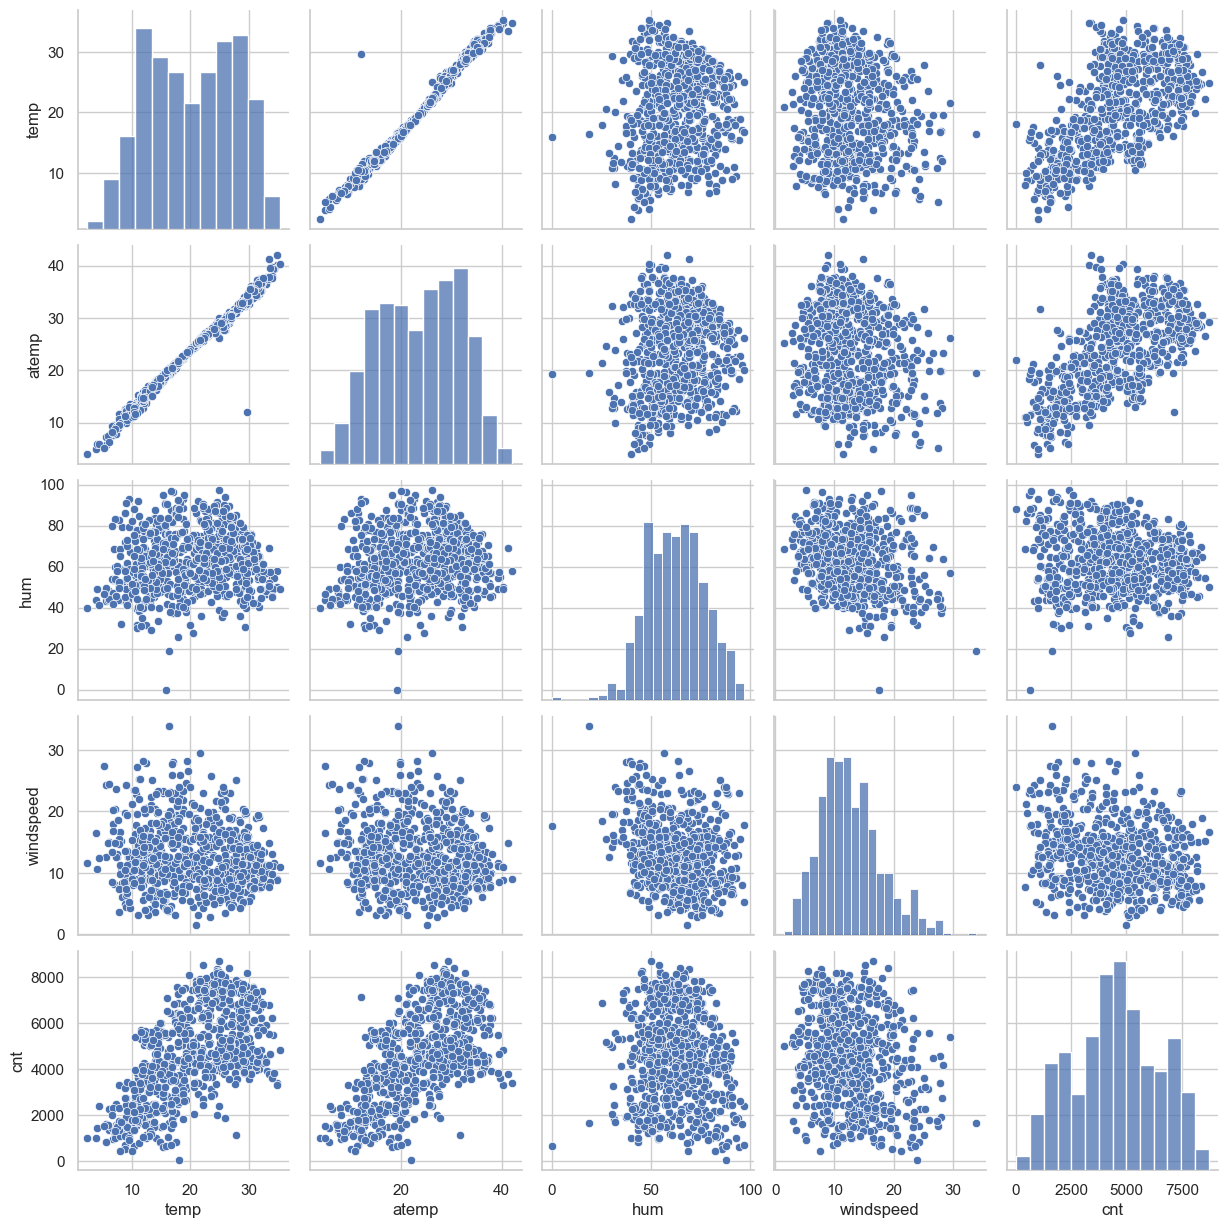

In [66]:
# pairplot of all the variables
sns.pairplot(df[num_cols])
plt.show()

#### Observations:
1. temp and atemp are highly correlated
2. temp and atemp are also linearly related to cnt

## MultiVariate Analysis

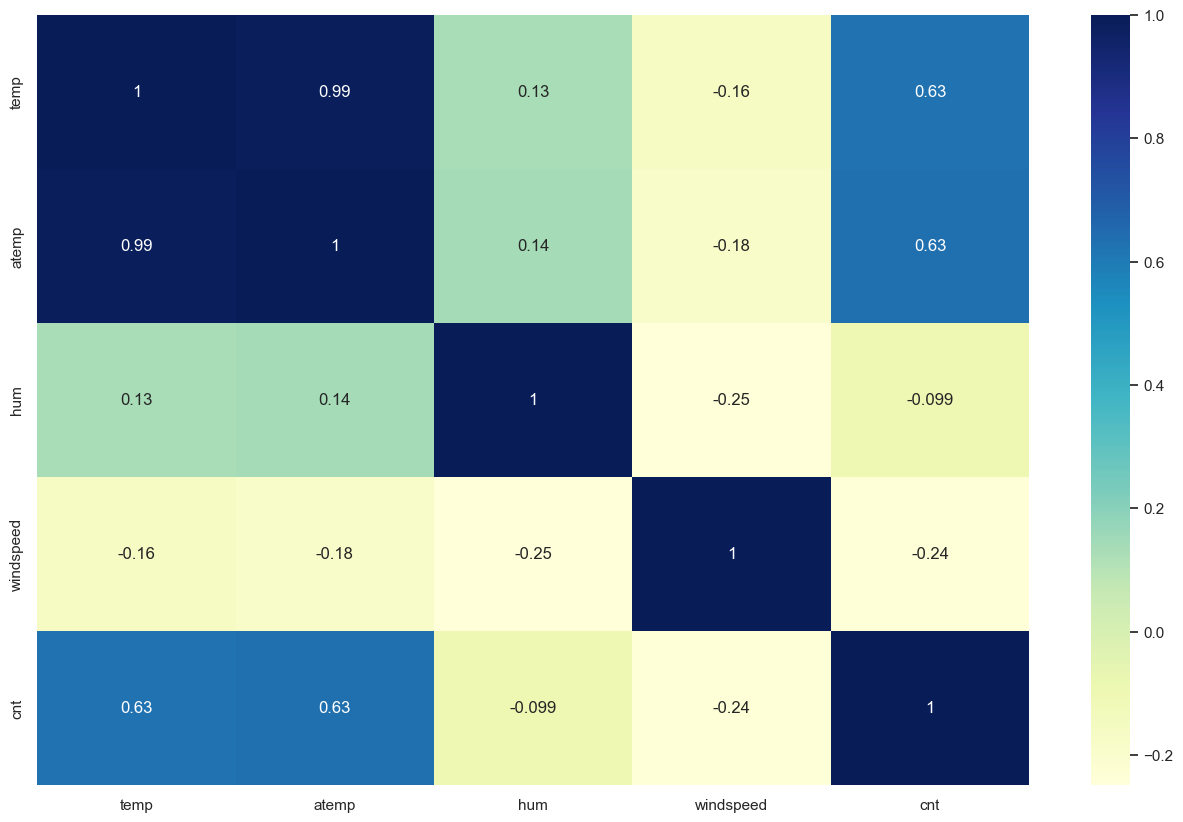

In [70]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 3: Data Preparation

### Dummy Variables

Many variables have multiple levels. We need to convert these levels into integer as well.

For this, we will make dummy variables.

In [75]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'temp' 
# and drop the first column from temp dataframe using 'drop_first = True'
temp = pd.get_dummies(df['season'], dtype=int, drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, temp], axis = 1)

# Drop 'season' as we have created the dummies for it
df.drop(['season'], axis = 1, inplace = True)

- `000` will correspond to `fall` -- dropped
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [78]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'temp' 
# and maintain a desired order of the columns as well as drop a column 
temp = pd.get_dummies(df['mnth'], dtype=int)

# Specify the desired order, dropping 'January' column
desired_order = ["February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Reorder the columns
temp = temp[desired_order]

# Add the results to the original dataframe
df = pd.concat([df, temp], axis = 1)

# Drop 'mnth' as we have created the dummies for it
df.drop(['mnth'], axis = 1, inplace = True)

- `00000000000` will correspond to `January`
- `10000000000` will correspond to `February`
- `01000000000` will correspond to `March`
- `00100000000` will correspond to `April`
- `00010000000` will correspond to `May`
- `00001000000` will correspond to `June`
- `00000100000` will correspond to `July`
- `00000010000` will correspond to `August`
- `00000001000` will correspond to `September`
- `00000000100` will correspond to `October`
- `00000000010` will correspond to `November`
- `00000000001` will correspond to `December`

In [81]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'temp' 
# # and maintain a desired order of the columns as well as drop a column 
temp = pd.get_dummies(df['weekday'], dtype=int)

# Specify the desired order, dropping 'Saturday' column
desired_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Reorder the columns
temp = temp[desired_order]

# Add the results to the original dataframe
df = pd.concat([df, temp], axis = 1)

# Drop 'weekday' as we have created the dummies for it
df.drop(['weekday'], axis = 1, inplace = True)

- `100000` will correspond to `Sunday`
- `010000` will correspond to `Monday`
- `001000` will correspond to `Tuesday`
- `000100` will correspond to `Wednesday`
- `000010` will correspond to `Thursday`
- `000001` will correspond to `Friday`
- `000000` will correspond to `Saturday`

In [84]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'temp' 
# # and maintain a desired order of the columns as well as drop a column 
temp = pd.get_dummies(df['weathersit'], dtype=int)

# Specify the desired order, dropping 'Heavy Rain' column
desired_order = ['Clear', 'Mist', 'Light Rain']

# Reorder the columns
temp = temp[desired_order]

# Add the results to the original dataframe
df = pd.concat([df, temp], axis = 1)

# Drop 'weathersit' as we have created the dummies for it
df.drop(['weathersit'], axis = 1, inplace = True)

- `100` will correspond to `Clear`
- `010` will correspond to `Mist`
- `001` will correspond to `Light Rain`
- `000` will correspond to `Heavy Rain`

In [87]:
df.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

In [90]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [92]:
df_train.shape

(510, 30)

In [94]:
df_test.shape

(219, 30)

### Rescaling the Features 

We will use MinMax scaling.

In [97]:
scaler = MinMaxScaler()

In [99]:
df_train.head()

,2019,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Clear,Mist,Light Rain
653,1,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,1,0,0,0,1,0,0
576,1,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,1,0,0
426,1,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,...,1,1,0,0,0,0,0,1,0,0
482,1,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [101]:
# Apply scaler() to all the numeric columns 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,2019,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Clear,Mist,Light Rain
653,1,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,1,0,0,0,1,0,0
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,1,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,1,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Dividing into X and Y sets for the model building

In [104]:
y_train = df_train.pop('cnt')
X_train = df_train

In [106]:
# Check all the columns of the dataframe

df.columns

Index(['2019', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Clear', 'Mist', 'Light Rain'],
      dtype='object')

## Step 5: Building a linear model

In [109]:
#Build a linear model with all the features

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.129616
2019          0.232208
workingday    0.086273
temp          0.401322
atemp         0.050628
hum          -0.151812
windspeed    -0.184388
spring       -0.048580
summer        0.038216
winter        0.105387
February      0.030389
March         0.063853
April         0.062565
May           0.087257
June          0.060862
July          0.023289
August        0.078641
September     0.144371
October       0.070260
November      0.020783
December      0.016994
Sunday       -0.054533
Monday       -0.106872
Tuesday      -0.104679
Wednesday    -0.091103
Thursday     -0.095120
Friday       -0.085371
Clear         0.149114
Mist          0.088084
Light Rain   -0.107583
dtype: float64

In [111]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.42e-181
Time:                        12:35:03   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1296      0.034      3.830      0.0

In [113]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,Clear,72.49
2,temp,67.12
3,atemp,56.09
27,Mist,45.42
6,spring,10.80
1,workingday,10.15
15,August,9.97
8,winter,9.52
14,July,8.92
7,summer,8.31


### Automatic Feature Selection by RFE (Recursive feature elimination)
using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [116]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)


rfe = RFE(estimator=lm, n_features_to_select=15)
# running RFE
rfe = rfe.fit(X_train, y_train)

In [118]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('2019', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('February', False, 12),
 ('March', False, 4),
 ('April', False, 5),
 ('May', False, 3),
 ('June', False, 6),
 ('July', False, 13),
 ('August', False, 7),
 ('September', True, 1),
 ('October', False, 9),
 ('November', False, 14),
 ('December', False, 15),
 ('Sunday', False, 2),
 ('Monday', True, 1),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1),
 ('Thursday', True, 1),
 ('Friday', True, 1),
 ('Clear', True, 1),
 ('Mist', False, 8),
 ('Light Rain', True, 1)]

In [120]:
col = X_train.columns[rfe.support_]
col

Index(['2019', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'September', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Clear', 'Light Rain'],
      dtype='object')

In [122]:
X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'October', 'November', 'December', 'Sunday', 'Mist'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [125]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 

X_train_rfe_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.95e-181
Time:                        12:35:20   Log-Likelihood:                 495.74
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     494   BIC:                            -891.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2729      0.037      7.436      0.0

In [127]:
# Calculate the VIFs for the new model


vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,30.16
3,hum,17.09
2,temp,15.14
10,Wednesday,8.58
9,Tuesday,7.27
11,Thursday,7.04
12,Friday,6.91
8,Monday,6.59
4,windspeed,4.09
13,Clear,3.22


#### p-value of all the features is below 0.05, although vifs are high
#### so dropping them one by one

In [130]:
# Dropping highly correlated variables and insignificant variables
# workingday having high vif (30.16)
X = X.drop(['workingday'], axis = 1)

In [132]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     172.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          7.46e-180
Time:                        12:35:31   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -949.4
Df Residuals:                     495   BIC:                            -885.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2758      0.037      7.435      0.0

In [134]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,17.07
1,temp,15.14
3,windspeed,4.09
12,Clear,3.22
4,spring,2.79
5,winter,2.19
0,2019,2.06
9,Wednesday,1.53
7,Monday,1.49
8,Tuesday,1.43


In [136]:
# Monday is having high p-value (0.657) so dropping it
X = X.drop(['Monday'], axis = 1)

In [138]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.92e-181
Time:                        12:35:42   Log-Likelihood:                 489.59
No. Observations:                 510   AIC:                            -951.2
Df Residuals:                     496   BIC:                            -891.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2739      0.037      7.439      0.0

In [140]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,16.59
1,temp,15.13
3,windspeed,4.08
11,Clear,3.20
4,spring,2.79
5,winter,2.19
0,2019,2.05
8,Wednesday,1.36
7,Tuesday,1.29
9,Thursday,1.29


In [142]:
# Tuesday is having high p-value (0.375) so dropping it
X = X.drop(['Tuesday'], axis = 1)

In [144]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          6.04e-182
Time:                        12:35:50   Log-Likelihood:                 489.19
No. Observations:                 510   AIC:                            -952.4
Df Residuals:                     497   BIC:                            -897.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2761      0.037      7.522      0.0

In [146]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,16.48
1,temp,15.06
3,windspeed,4.07
10,Clear,3.20
4,spring,2.78
5,winter,2.19
0,2019,2.05
7,Wednesday,1.28
8,Thursday,1.23
9,Friday,1.22


In [148]:
# Thursday is having high p-value (0.300) so dropping it
X = X.drop(['Thursday'], axis = 1)

In [150]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          6.81e-183
Time:                        12:36:10   Log-Likelihood:                 488.63
No. Observations:                 510   AIC:                            -953.3
Df Residuals:                     498   BIC:                            -902.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2797      0.037      7.650      0.0

In [152]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,16.44
1,temp,15.03
3,windspeed,4.07
9,Clear,3.18
4,spring,2.78
5,winter,2.19
0,2019,2.05
7,Wednesday,1.23
8,Friday,1.18
6,September,1.16


In [154]:
# Friday is having high p-value (0.089) so dropping it
X = X.drop(['Friday'], axis = 1)

In [156]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.81e-183
Time:                        12:36:23   Log-Likelihood:                 487.16
No. Observations:                 510   AIC:                            -952.3
Df Residuals:                     499   BIC:                            -905.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2861      0.036      7.854      0.0

In [158]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,16.42
1,temp,14.94
3,windspeed,4.07
8,Clear,3.18
4,spring,2.77
5,winter,2.19
0,2019,2.05
7,Wednesday,1.20
6,September,1.16
9,Light Rain,1.14


In [160]:
# Wednesday is having high p-value (0.115) so dropping it
X = X.drop(['Wednesday'], axis = 1)

In [162]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.71e-184
Time:                        12:36:28   Log-Likelihood:                 485.89
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     500   BIC:                            -909.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2884      0.036      7.911      0.0

In [164]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,16.33
1,temp,14.93
3,windspeed,4.07
7,Clear,3.17
4,spring,2.76
5,winter,2.19
0,2019,2.05
6,September,1.16
8,Light Rain,1.13


In [166]:
# all features have p-value < 0.05, but hum and temp have high vif so dropping hum now
X = X.drop(['hum'], axis = 1)

In [168]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     290.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.26e-182
Time:                        12:36:34   Log-Likelihood:                 479.35
No. Observations:                 510   AIC:                            -940.7
Df Residuals:                     501   BIC:                            -902.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1883      0.024      7.879      0.0

In [170]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.60
2,windspeed,3.95
6,Clear,2.82
0,2019,2.05
3,spring,1.69
4,winter,1.36
5,September,1.15
7,Light Rain,1.11


## Residual Analysis of the train data and validating the assumptions

#### 1. Linearity: There is linear relationship between predictors and dependent
If the p-values for the predictors are small (usually < 0.05), it suggests that the predictors have a statistically significant linear relationship with the dependent variable.
The p-values in our final model are below 0.05

#### 2. Error terms are normally distributed with mean zero
now to check if the error terms are also normally distributed, let us plot the histogram of the error terms and see what it looks like.

In [175]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

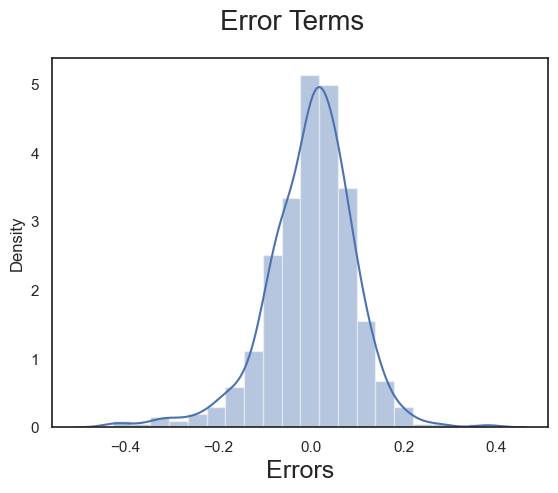

In [177]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.set_style("white")
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### 3. No Multicollinearity: 
Let's check the correlation coefficients to see whether variables are correlated. Also, a VIF value above 5 or 10 indicates high multicollinearity (The final model has all VIFs < 5).


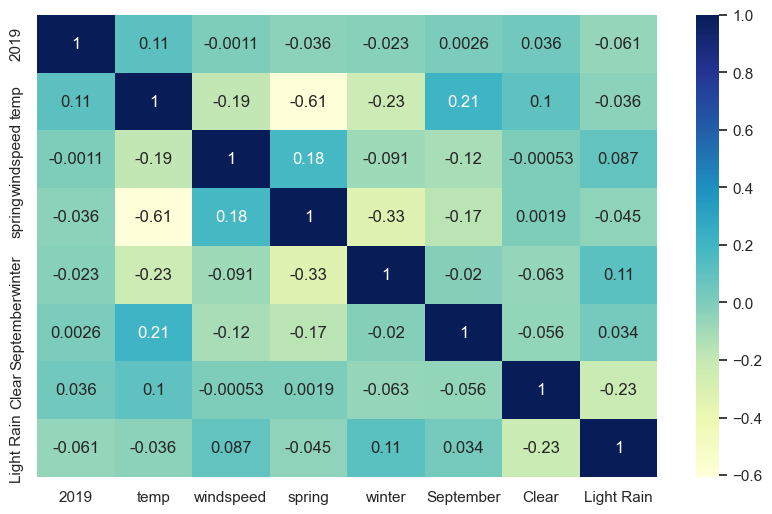

In [180]:

plt.figure(figsize = (10, 6))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### 4. Error terms have constant variance (homoscedasticity):
Plot the residuals against the fitted (predicted) values. The plot should show a constant spread of residuals across the range of predicted values.

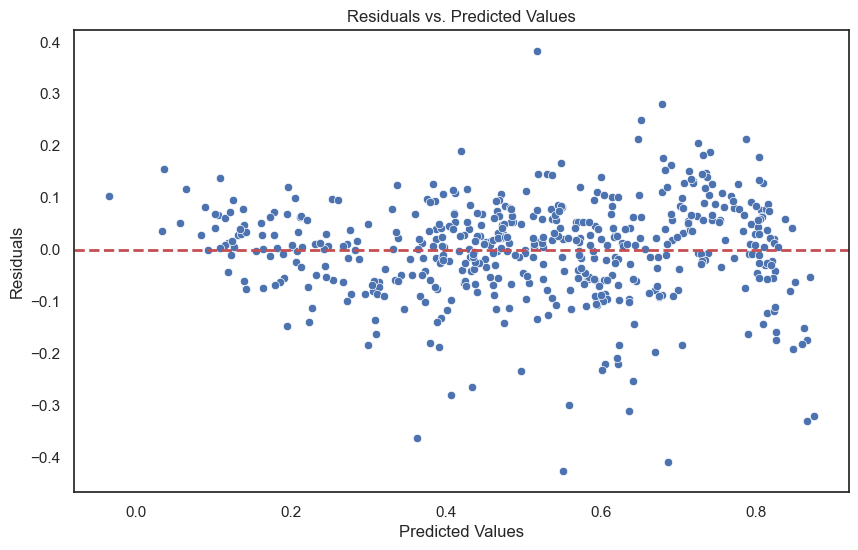

In [183]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_cnt, y=(y_train - y_train_cnt))
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

#### 5. Error terms are independent of each other:
Durbin-Watson Test: A value near 2 indicates no autocorrelation.

In [186]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(y_train - y_train_cnt)
print(f'Durbin-Watson statistic: {dw}')

Durbin-Watson statistic: 1.9999932733055643


## Making Predictions

#### Applying the scaling on the test sets

In [190]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,2019,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Clear,Mist,Light Rain
184,0,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,1,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,1,0,0,1,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,1,0,0


#### Dividing into X_test and y_test

In [193]:
y_test = df_test.pop('cnt')
X_test = df_test

In [195]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test 
# and having the same columns as tarining set
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [197]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

In [200]:
# r2_score
r2_score(y_true = y_test,y_pred = y_pred)

0.802100015911139

We can see that the equation of our best fitted line is:

$ cnt = 0.4090  \times  temp + 0.2357  \times  '2019' - 0.2074 \times Light Rain - 0.1372 \times windspeed - 0.1189 \times spring + 0.0769 \times Clear + 0.0662 \times September + 0.0451 \times winter + 0.1883 $


#### We can see that the r2_score is finally 0.8021 on the test set and the final r2_score on the training set was 0.823. 
#### So this is pretty reasonable. This is close to the what we had found in the training. 
#### We can say that what the model has learnt on the training set, it is also able to generalise very well on the test set.
#### Overall we have a decent model.